In [1]:
#Fichier de Paul Huguet et Audrey Bovet

#On récupère les données
import pandas as pd
df_train = pd.read_csv("train.csv",sep = ',')


In [5]:
#On affiche les entêtes des données et réalise un petit test pour vérifier le format
print(df_train.head())
print("Test des indexes")
print((df_train["id"][0]), df_train["Temparature"][0])

   id  Temparature  Humidity  Moisture Soil Type  Crop Type  Nitrogen  \
0   0           37        70        36    Clayey  Sugarcane        36   
1   1           27        69        65     Sandy    Millets        30   
2   2           29        63        32     Sandy    Millets        24   
3   3           35        62        54     Sandy     Barley        39   
4   4           35        58        43       Red      Paddy        37   

   Potassium  Phosphorous Fertilizer Name  
0          4            5           28-28  
1          6           18           28-28  
2         12           16        17-17-17  
3         12            4        10-26-26  
4          2           16             DAP  
Test des indexes
0 37


In [6]:
#On réalise un premier test en soumettant toujours les 3 mêmes engrais 
#On prend les 3 qui reviennent le plus souvent dans les données d'entrainement
import collections as coll
counter = coll.Counter(df_train["Fertilizer Name"]) # on compte la récurrence de chaque fertilizer présent dans les données
print(counter)
top_three = counter.most_common(3) #on récupère les 3 engrais les plus récurrents
print(top_three[0])
most_fertilize_3 = [top_three[i][0] for i in range(3)]
print(most_fertilize_3)

Counter({'14-35-14': 114436, '10-26-26': 113887, '17-17-17': 112453, '28-28': 111158, '20-20': 110889, 'DAP': 94860, 'Urea': 92317})
('14-35-14', 114436)
['14-35-14', '10-26-26', '17-17-17']


In [9]:
#On affiche juste les données de test pour vérifier le format
df_test = pd.read_csv("test.csv",sep = ',')
print(df_test.head())
print("Test des indexes")
print((df_test["id"][0]), df_test["Temparature"][0])

       id  Temparature  Humidity  Moisture Soil Type    Crop Type  Nitrogen  \
0  750000           31        70        52     Sandy        Wheat        34   
1  750001           27        62        45       Red    Sugarcane        30   
2  750002           28        72        28    Clayey  Ground Nuts        14   
3  750003           37        53        57     Black  Ground Nuts        18   
4  750004           31        55        32       Red       Pulses        13   

   Potassium  Phosphorous  
0         11           24  
1         14           15  
2         15            4  
3         17           36  
4         19           14  
Test des indexes
750000 31


In [10]:
fertilizer_prediction = {}
for id in df_test["id"]:
    fertilizer_prediction[id] = most_fertilize_3

In [11]:
#On regarde les moyennes et variances des différentes colonnes pour voir 
# s'il y a de grands écarts qui pourraient gêner l'entrainement
import pandas as pd
import numpy as np

def mean_and_variance_data(df, numeric_columns):
    stats = {}
    for col in numeric_columns:
        mean = df[col].mean()
        std = df[col].std()
        stats[col] = (mean, std)
        
    return stats

stats = mean_and_variance_data(df_train, ["Temparature","Humidity","Moisture","Nitrogen","Potassium","Phosphorous"])
print(stats)

{'Temparature': (np.float64(31.503565333333334), np.float64(4.02557369353193)), 'Humidity': (np.float64(61.038912), np.float64(6.647695398561932)), 'Moisture': (np.float64(45.18414666666666), np.float64(11.794593598554938)), 'Nitrogen': (np.float64(23.093808), np.float64(11.216125168453724)), 'Potassium': (np.float64(9.478296), np.float64(5.765621787189142)), 'Phosphorous': (np.float64(21.073226666666667), np.float64(12.346830893563999))}


In [12]:
#Cette fonction sert à mettre sous le format csv id : engrais1 engrais2 engrais3 attendu
def formatage_submission(fertilizer_prediction):
    df_prediction = pd.DataFrame({
    "id": fertilizer_prediction.keys(),
    "Fertilizer Name": [
        " ".join(v) for v in fertilizer_prediction.values()
    ]
    })
    return df_prediction
    


In [13]:
#On soumet notre prédiction test 
df_submission = formatage_submission(fertilizer_prediction)
print(df_submission.head())
print(df_submission["id"][0:3], df_submission["Fertilizer Name"][0:3])
df_submission.to_csv("submission_test.csv", index=False)

#Le score minimal que l'on doit dépasser est donc 0.27940
#Score : 0.27940

       id             Fertilizer Name
0  750000  14-35-14 10-26-26 17-17-17
1  750001  14-35-14 10-26-26 17-17-17
2  750002  14-35-14 10-26-26 17-17-17
3  750003  14-35-14 10-26-26 17-17-17
4  750004  14-35-14 10-26-26 17-17-17
0    750000
1    750001
2    750002
Name: id, dtype: int64 0    14-35-14 10-26-26 17-17-17
1    14-35-14 10-26-26 17-17-17
2    14-35-14 10-26-26 17-17-17
Name: Fertilizer Name, dtype: object


In [14]:
X_train = df_train.drop(columns=["Fertilizer Name"])
y_train = df_train["Fertilizer Name"]

from sklearn.model_selection import train_test_split
#Si jamais on veut faire quelques tests sur un sous échantillon on peut diminuer 
# le n_travail (ce qui a été fait pour tester quelques paramètres rapidement)
#Dans cette version finale, on travaillera directement avec X_train et y_train complets
n_travail = 750000

sample_idx = X_train.sample(n=n_travail, random_state=10).index
X_sample = X_train.loc[sample_idx]
y_sample = y_train.loc[sample_idx]
X_train_travail, X_val_travail, y_train_travail, y_val_travail = train_test_split(
    X_sample,
    y_sample,
    test_size=0.2,
    random_state=10
)


In [15]:
#On regarde ici les données qui ne sont pas numériques pour en avoir une idée
list_of_soil = np.unique(df_train["Soil Type"])
print(list_of_soil)
list_of_crop = np.unique(df_train["Crop Type"])
print(list_of_crop)

list_of_fertelizer = np.unique(df_train["Fertilizer Name"])
print(list_of_fertelizer)


['Black' 'Clayey' 'Loamy' 'Red' 'Sandy']
['Barley' 'Cotton' 'Ground Nuts' 'Maize' 'Millets' 'Oil seeds' 'Paddy'
 'Pulses' 'Sugarcane' 'Tobacco' 'Wheat']
['10-26-26' '14-35-14' '17-17-17' '20-20' '28-28' 'DAP' 'Urea']


In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

categorical_features = ["Soil Type", "Crop Type"]
numerical_features = X_train_travail.columns.difference(
    categorical_features + ["id"]
)


In [17]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

#On normalise les données pour permettre un meilleur entrainement
numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

#Il est important de transformer les données texutuelles en données numériques 
#de manière à ne pas introduire de biais dans l'entrainement donc avec OneHotEncoder
#qui crée des colonnes binaires pour chaque catégorie
categorical_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

pipeline = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("random_forest", RandomForestClassifier(
        bootstrap=True,
        max_samples=0.5,
        random_state=10
    ))
])


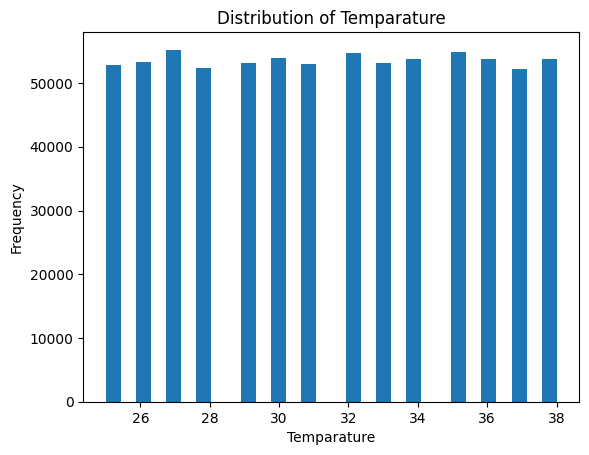

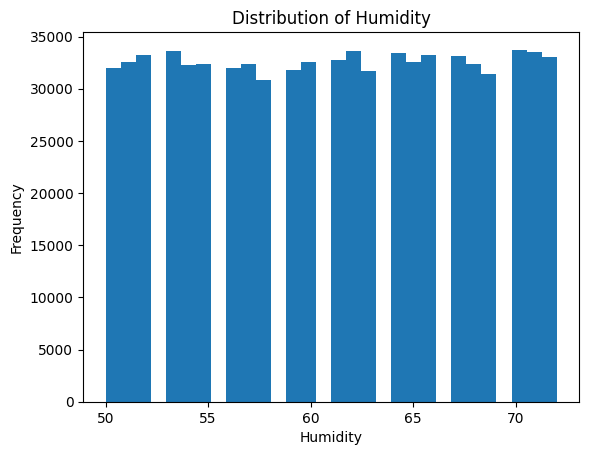

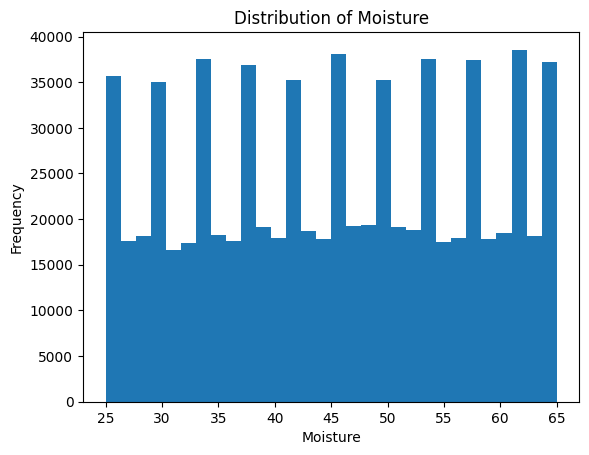

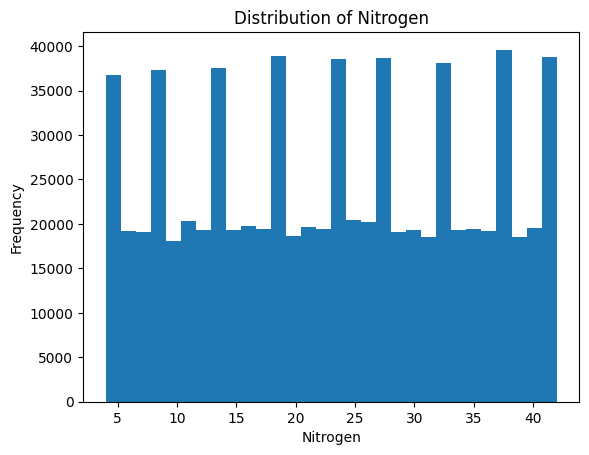

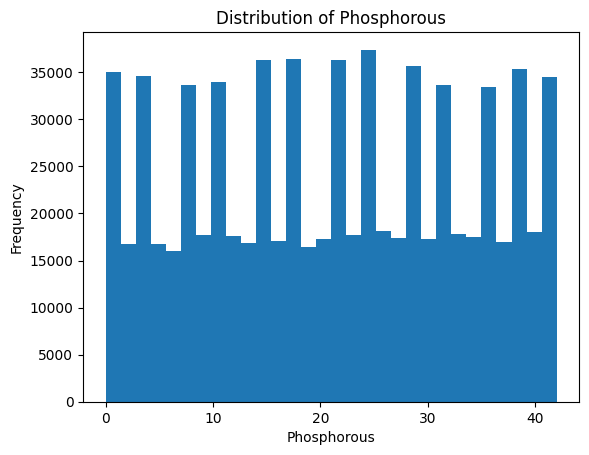

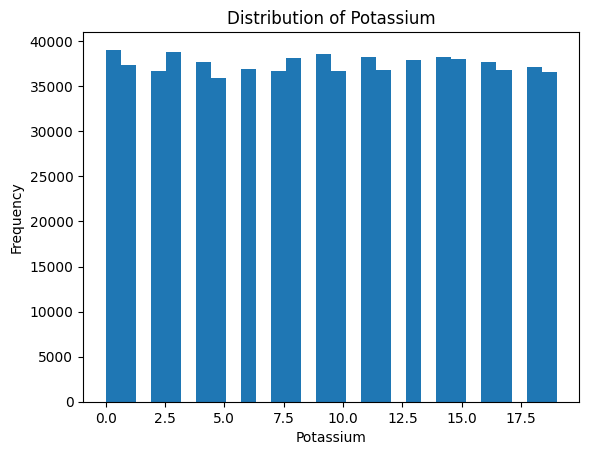

In [18]:
#On regarde la distribution des différentes colonnes numériques pour voir
# s'il n'y a pas de points aberrants ou de distribution étrange
#Heureusement ici, les données sont très propres

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("train.csv")

numeric_cols = [
    "Temparature", "Humidity", "Moisture",
    "Nitrogen", "Phosphorous", "Potassium"
]

for col in numeric_cols:
    plt.figure()
    plt.hist(df[col], bins=30)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.title(f"Distribution of {col}")
    plt.show()


In [ ]:
#On test ici, avec de la cross validation, différents hyperparamètres pour le Random Forest
# Attention, le score utilisé pour le gridsearch et celui du challenge sont différents
# ce qui fait que notre méthode ne garantit pas forcément le meilleur score pour les paramètres choisis

#Du au temps de calcul important, on n'a pu tester qu'un petit nombre de combinaisons
from sklearn.model_selection import GridSearchCV
print("Début du Grid Search")
hyperparameters = {
    'random_forest__n_estimators': [150, 600],
    'random_forest__max_depth': [15,35],
    'random_forest__min_samples_leaf': [5, 20]
}
print(X_train.shape)
gridsearch = GridSearchCV(pipeline, hyperparameters,cv=10,verbose=10,return_train_score=True)
gridsearch.fit(X_train, y_train)
best_model = gridsearch.best_estimator_
best_param = gridsearch.best_params_
print(best_param)


#On a fait quelques tests avec différents n_travail et random states pour voir les ordres de grandeurs 
# de paramètres optimaux
#2000
#random state 10
#{'random_forest__max_depth': 10, 'random_forest__min_samples_leaf': 5, 'random_forest__n_estimators': 50}

#random state 12


#{'random_forest__max_depth': 5, 'random_forest__min_samples_leaf': 5, 'random_forest__n_estimators': 200}

#random state 10 
#{'random_forest__max_depth': 20, 'random_forest__min_samples_leaf': 10, 'random_forest__n_estimators': 200}

#nb_travail 50000
#random state 10
#{'random_forest__max_depth': 10, 'random_forest__min_samples_leaf': 5, 'random_forest__n_estimators': 200}

#nb_travail 100000
#random state 10

#{'random_forest__max_  depth': 20, 'random_forest__min_samples_leaf': 10, 'random_forest__n_estimators': 200}

#(120000, 9)
#{'random_forest__max_depth': 10, 'random_forest__min_samples_leaf': 2, 'random_forest__n_estimators': 200}   

Début du Grid Search
(750000, 9)
Fitting 10 folds for each of 8 candidates, totalling 80 fits
[CV 1/10; 1/8] START random_forest__max_depth=15, random_forest__min_samples_leaf=5, random_forest__n_estimators=150
[CV 1/10; 1/8] END random_forest__max_depth=15, random_forest__min_samples_leaf=5, random_forest__n_estimators=150;, score=(train=0.392, test=0.179) total time= 1.2min
[CV 2/10; 1/8] START random_forest__max_depth=15, random_forest__min_samples_leaf=5, random_forest__n_estimators=150
[CV 2/10; 1/8] END random_forest__max_depth=15, random_forest__min_samples_leaf=5, random_forest__n_estimators=150;, score=(train=0.393, test=0.180) total time= 1.1min
[CV 3/10; 1/8] START random_forest__max_depth=15, random_forest__min_samples_leaf=5, random_forest__n_estimators=150
[CV 3/10; 1/8] END random_forest__max_depth=15, random_forest__min_samples_leaf=5, random_forest__n_estimators=150;, score=(train=0.398, test=0.179) total time= 1.1min
[CV 4/10; 1/8] START random_forest__max_depth=15, r

In [19]:
import numpy as np

def postraitement(model, X, ids):
    proba = model.predict_proba(X)
    classes = model.classes_

    top_k_idx = np.argsort(proba, axis=1)[:, -3:][:, ::-1]

    predictions = {}
    for i, idxs in enumerate(top_k_idx):
        predictions[ids.iloc[i]] = classes[idxs].tolist()

    return predictions


In [20]:
#Dans le cas de l'entrainement complet, voici les meilleurs paramètres trouvés
print(best_param)

NameError: name 'best_param' is not defined

In [ ]:
fertilizer_prediction = postraitement(
    model=best_model,
    X=df_test.drop(columns=["id"]),
    ids=df_test["id"]
)

df_submission = formatage_submission(fertilizer_prediction)
print(df_submission.shape)
df_submission.to_csv("submission_arbres2.csv", index=False)

# Score pour random forest {'random_forest__max_depth': 10, 'random_forest__min_samples_leaf': 2, 'random_forest__n_estimators': 200}
#0.29559

#Score pour random forest {'random_forest__max_depth': 35, 'random_forest__min_samples_leaf': 20, 'random_forest__n_estimators': 600}
#0.3167


(250000, 2)


In [21]:
from sklearn.ensemble import GradientBoostingClassifier
# On test ici un modèle de gradient boosting 
pipeline_gb = Pipeline(steps=[
    ("preprocessing", preprocessor),
    ("gradient_boosting", GradientBoostingClassifier(subsample=0.8,n_estimators=600,learning_rate=0.1,max_depth=4,min_samples_leaf=20,random_state=10
    ))
])


In [22]:
model_gb = pipeline_gb
model_gb.fit(X_train, y_train)


KeyboardInterrupt: 

In [38]:
fertilizer_prediction = postraitement(
    model=model_gb,
    X=df_test.drop(columns=["id"]),
    ids=df_test["id"]
)

df_submission = formatage_submission(fertilizer_prediction)
print(df_submission.shape)
df_submission.to_csv("submission_gradient_boosting.csv", index=False)

(250000, 2)


In [36]:
hyperparameters_gb = {
    "gradient_boosting__n_estimators": [600],
    "gradient_boosting__learning_rate": [0.1],
    "gradient_boosting__max_depth": [4],
    "gradient_boosting__min_samples_leaf": [20]
}

gridsearch_gb = GridSearchCV(pipeline_gb,hyperparameters_gb,cv=10,verbose=10)
gridsearch_gb.fit(X_train, y_train)
best_model = gridsearch_gb.best_estimator_
best_param = gridsearch_gb.best_params_

print(best_param)


Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV 1/10; 1/1] START gradient_boosting__learning_rate=0.1, gradient_boosting__max_depth=4, gradient_boosting__min_samples_leaf=20, gradient_boosting__n_estimators=600


KeyboardInterrupt: 

In [28]:
import numpy as np

def postraitement_ensemble(models, X, ids, top_k=3):
    """
    Prédiction par moyenne des probabilités sur un ensemble de modèles
    + extraction du top_k comme dans ton post-traitement initial.
    """

    # Moyenne des probabilités
    probas = np.mean([m.predict_proba(X) for m in models], axis=0)

    classes = models[0].classes_

    top_k_idx = np.argsort(probas, axis=1)[:, -top_k:][:, ::-1]

    predictions = {}
    for i, idxs in enumerate(top_k_idx):
        predictions[ids.iloc[i]] = classes[idxs].tolist()

    return predictions


In [33]:
ensemble_models = []
from sklearn.base import clone

for i in range(10):
    print(f"Entraînement du modèle {i+1}/10")
    model = clone(pipeline)
    model.set_params(
        random_forest__max_depth=35,
        random_forest__min_samples_leaf=20,
        random_forest__n_estimators=600,
        random_forest__random_state=10 + 10*i
    )
    model.fit(X_train, y_train)
    ensemble_models.append(model)


Entraînement du modèle 1/10
Entraînement du modèle 2/10
Entraînement du modèle 3/10
Entraînement du modèle 4/10
Entraînement du modèle 5/10
Entraînement du modèle 6/10
Entraînement du modèle 7/10
Entraînement du modèle 8/10
Entraînement du modèle 9/10
Entraînement du modèle 10/10


In [34]:
fertilizer_prediction = postraitement_ensemble(
    models=ensemble_models,
    X=df_test.drop(columns=["id"]),
    ids=df_test["id"]
)

df_submission = formatage_submission(fertilizer_prediction)
print(df_submission.shape)
df_submission.to_csv("submission_arbres_moyenne2.csv", index=False)


(250000, 2)


In [ ]:
fertilizer_prediction = postraitement(
    model=best_model,
    X=df_test.drop(columns=["id"]),
    ids=df_test["id"]
)

df_submission = formatage_submission(fertilizer_prediction)
print(df_submission.shape)
df_submission.to_csv("submission_arbres_moyenne.csv", index=False)
